In [20]:
#! pip install numpy
#! pip install scipy
#! pip install scikit-learn
#! pip install pandas
#! pip install matplotlib
#! pip install seaborn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Configuración para reproducibilidad
np.random.seed(0)

# Generar datos de ejemplo
n = 100
real = np.random.choice(['Cáncer', 'No Cáncer'], size=n, p=[0.6, 0.4])
pred = []

# Generar predicciones con cierta precisión
for r in real:
    if r == 'Cáncer':
        pred.append(np.random.choice(['Cáncer', 'No Cáncer'], p=[0.83, 0.17]))
    else:
        pred.append(np.random.choice(['Cáncer', 'No Cáncer'], p=[0.13, 0.87]))

# Crear el DataFrame con los datos de ejemplo
data = {
    'ID': range(1, n+1),
    'Real': real,
    'Predicción': pred
}

df = pd.DataFrame(data)
df



,ID,Real,Predicción
0,1,Cáncer,Cáncer
1,2,No Cáncer,No Cáncer
2,3,No Cáncer,No Cáncer
3,4,Cáncer,No Cáncer
4,5,Cáncer,Cáncer
...,...,...,...
95,96,Cáncer,Cáncer
96,97,Cáncer,Cáncer
97,98,Cáncer,Cáncer
98,99,No Cáncer,Cáncer


In [24]:
# Convertir las etiquetas a valores binarios para el cálculo de métricas
df['Real_bin'] = df['Real'].apply(lambda x: 1 if x == 'Cáncer' else 0)
df['Predicción_bin'] = df['Predicción'].apply(lambda x: 1 if x == 'Cáncer' else 0)

df

,ID,Real,Predicción,Real_bin,Predicción_bin
0,1,Cáncer,Cáncer,1,1
1,2,No Cáncer,No Cáncer,0,0
2,3,No Cáncer,No Cáncer,0,0
3,4,Cáncer,No Cáncer,1,0
4,5,Cáncer,Cáncer,1,1
...,...,...,...,...,...
95,96,Cáncer,Cáncer,1,1
96,97,Cáncer,Cáncer,1,1
97,98,Cáncer,Cáncer,1,1
98,99,No Cáncer,Cáncer,0,1


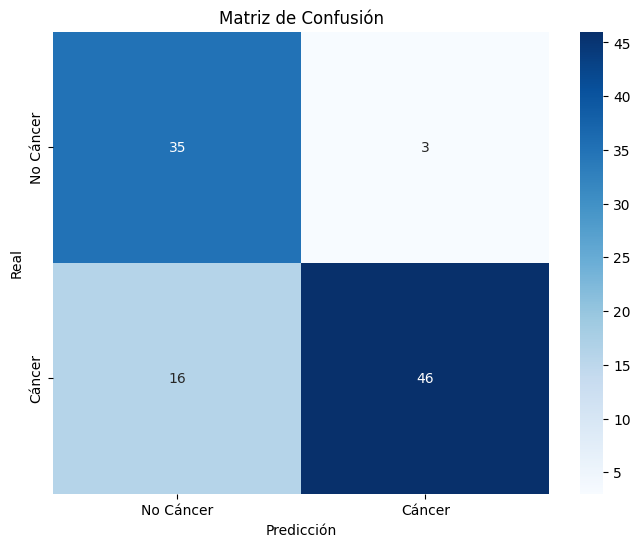

In [27]:
# Calcular la matriz de confusión y las métricas
cm = confusion_matrix(df['Real_bin'], df['Predicción_bin'])
accuracy = accuracy_score(df['Real_bin'], df['Predicción_bin'])
precision = precision_score(df['Real_bin'], df['Predicción_bin'])
recall = recall_score(df['Real_bin'], df['Predicción_bin'])
f1 = f1_score(df['Real_bin'], df['Predicción_bin'])

# Mostrar la matriz de confusión como imagen
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cáncer', 'Cáncer'], yticklabels=['No Cáncer', 'Cáncer'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [28]:
# Mostrar las métricas
print("\nPrecisión (Accuracy):", accuracy)
print("Precisión Positiva (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)


Precisión (Accuracy): 0.81
Precisión Positiva (Precision): 0.9387755102040817
Sensibilidad (Recall): 0.7419354838709677
Puntuación F1 (F1 Score): 0.8288288288288288
